# ***PS4***

## **Question 1**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

hand_data_path = "./all-hands.dat" # constant for the path of the data

# load the data
hand_data = pd.read_csv(hand_data_path, header = None)
hand_data.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,296,509,305,481,329,465,350,443,365,417,...,136,369,141,407,152,442,153,477,142,511
1,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
2,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
3,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
4,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509


### **(a)**

In [2]:
"""
This function calculates the mean of each column
and separates them into two numpy arrays where one
correlates with the x-axis and the other with the
y-axis.
@data = the data to feed into the function

"""
def calculate_means(data):
  m = data.shape[1] # number of "examples"
  n = data.shape[0] # number of datapoints

  # creates 72 x 1 np.arrays that stores the means
  x_axis_np = np.ones(shape = ((int)(m/2), 1))
  y_axis_np = np.ones(shape = ((int)(m/2), 1))
  index_to_add = 0 # keep track of the index

  # loop through all the "examples"
  for col in range(m):
    column = data.loc[:, col]
    sum = 0

    # loops through all the points
    for row in range(n):
      sum += data.loc[row, col]

    # take the average and place in correct array
    avg = sum / n
    if col % 2 == 0: # if the column is even then put in x[index]
      x_axis_np[index_to_add] = avg
    else:
      y_axis_np[index_to_add] = avg
      index_to_add += 1 # increment index_to_add since everytime there is an odd index, both x and y arrays have filled at the same index location

  return x_axis_np, y_axis_np

x_axis_np, y_axis_np = calculate_means(hand_data)

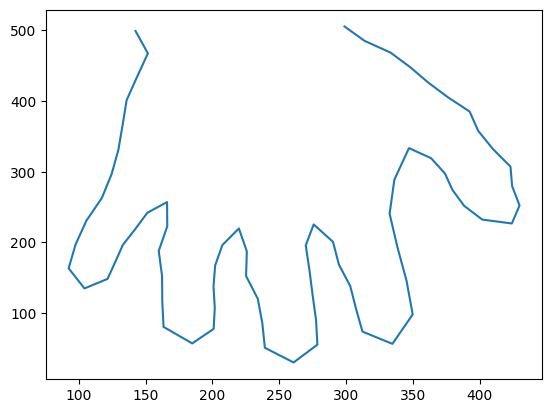

In [3]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.plot(x_axis_np, y_axis_np)

In [4]:
print(x_axis_np)

[[298.88888889]
 [313.94444444]
 [333.33333333]
 [348.16666667]
 [361.5       ]
 [376.44444444]
 [392.55555556]
 [399.        ]
 [410.05555556]
 [423.16666667]
 [424.38888889]
 [429.94444444]
 [424.16666667]
 [402.        ]
 [388.38888889]
 [379.72222222]
 [374.11111111]
 [363.72222222]
 [347.16666667]
 [336.22222222]
 [332.66666667]
 [338.55555556]
 [345.33333333]
 [349.94444444]
 [334.77777778]
 [312.33333333]
 [307.55555556]
 [303.22222222]
 [294.72222222]
 [290.27777778]
 [275.83333333]
 [269.88888889]
 [272.66666667]
 [275.        ]
 [277.55555556]
 [278.61111111]
 [260.77777778]
 [239.27777778]
 [237.38888889]
 [234.        ]
 [225.22222222]
 [225.77777778]
 [219.83333333]
 [207.44444444]
 [202.05555556]
 [200.83333333]
 [201.77777778]
 [200.94444444]
 [184.88888889]
 [163.44444444]
 [162.5       ]
 [162.33333333]
 [159.83333333]
 [166.22222222]
 [166.05555556]
 [151.27777778]
 [142.33333333]
 [132.94444444]
 [127.33333333]
 [121.5       ]
 [104.22222222]
 [ 92.38888889]
 [ 97.61

### **(b)**

In [5]:
"""
This function calculates the covariance of
two columns and returns the value.
@X = the first vector (pd.series)
@Y = the second vector (pd.series)
"""
def calculate_covariance(X, Y):
  n = len(X) # get the length of a vector

  sum = 0 # sum
  X_mean = np.mean(X) # gets the mean
  Y_mean = np.mean(Y)

  # loop over all elements in the vectors
  for i in range(n):
    sum += (X[i] - X_mean) * (Y[i] - Y_mean)

  return sum / (n - 1) # divide by n - 1

# print(calculate_covariance(hand_data.loc[:, 0], hand_data.loc[:, 0])) # testing purpose

In [16]:
"""
This function calculates the covariance matrix
of a particular dataset .
@data = the dataset you want to compute the covariance
        matrix with
"""
def calculate_covariance_matrix(data):
  n = data.shape[1] # grabs number of features
  cov_matrix = np.ones(shape = (n, n)) # initializes a covariance matrix
  total_variance = 0

  # loop over each features with each other
  for i in range(n): # outer loop
    for j in range(n): # inner loop
      cov_value = calculate_covariance(data.loc[:, i], data.loc[:, j])
      cov_matrix[i][j] = cov_value
      total_variance += cov_value

  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  total_variance = sum(eigenvalues)

  return cov_matrix, total_variance


covariance_matrix, total_variance = calculate_covariance_matrix(hand_data)
print("The total variance is:", total_variance)

The total variance is: 48685.06862745098


### **(c)**

In [7]:
print("The covariance between x1 and x2 coordinates is", covariance_matrix[0][2])

The covariance between x1 and x2 coordinates is 533.1111111111112


In [8]:
"""
This function calculates the correlation between two vectors.
@X = the first vector
@Y = the second vector
"""
def calculate_correlation(X, Y):
  return np.dot(X, Y) / (np.linalg.norm(X) * np.linalg.norm(Y))

x1_x2_corr = calculate_correlation(hand_data.loc[:, 0], hand_data.loc[:, 2])
print("The correlation between x1 and x2 is", x1_x2_corr)

The correlation between x1 and x2 is 0.9999507626010683


In [9]:
# testing purposes
# test_data = pd.concat([hand_data.loc[:, 0], hand_data.loc[:, 2]], axis = 1)
# print(test_data.corr())

The correlation comes out to such a high value for $x1$ and $x2$ because of how close they are in the cartesian plane. Because of their proximity, this seems to imply that the two variables have some a strong relationship with each other.

### **(d)**

In [19]:
# eigenvalues and eigenvectors for pca
def pca(data):
  cov_matrix, _ = calculate_covariance_matrix(data)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  return eigenvalues, eigenvectors

eigenvalues, eigenvectors = pca(hand_data)
print(eigenvalues, "\n")
print(eigenvectors)

[-5.94610436e-12 -4.77878874e-12 -4.15340386e-12 -3.31790644e-12
 -3.18622970e-12 -2.66947514e-12 -2.13301935e-12 -2.09402010e-12
 -1.87634378e-12 -1.78238594e-12 -1.74987949e-12 -1.64637289e-12
 -1.50062012e-12 -1.47111603e-12 -1.31505393e-12 -1.24653775e-12
 -1.12836991e-12 -1.11492129e-12 -1.01146385e-12 -9.13709001e-13
 -9.09093060e-13 -8.84038110e-13 -7.32566058e-13 -7.05531045e-13
 -6.71534795e-13 -6.61848830e-13 -6.51344608e-13 -5.26713998e-13
 -5.19852341e-13 -5.06069372e-13 -4.47442683e-13 -4.45339798e-13
 -3.85151176e-13 -3.65779198e-13 -3.56035898e-13 -3.04352621e-13
 -3.03136650e-13 -3.00157363e-13 -2.93777495e-13 -2.74675467e-13
 -2.41193196e-13 -2.33550296e-13 -2.22792023e-13 -2.10485342e-13
 -1.91360409e-13 -1.78684349e-13 -1.66527083e-13 -1.57164462e-13
 -1.36122167e-13 -1.34852858e-13 -1.32026710e-13 -1.13377561e-13
 -1.04836976e-13 -1.00359260e-13 -1.00313390e-13 -8.25414581e-14
 -8.18167485e-14 -6.86139740e-14 -5.26415191e-14 -5.06485981e-14
 -4.85225943e-14 -1.77541

### **(e)**

In [11]:
"""
This function calculates the proportion of variance.
@lambda_val = eigenvalues associated with covariance matrix decomposition
"""
def proportion_of_variances(lambda_val):
  total = sum(lambda_val) # gets the sum
  n = len(lambda_val) # length of lambda value
  prop_of_var = [0] * n # stores a list

  # loops through all lambda values
  for i in range(n):
    prop_of_var[n - 1 - i] = lambda_val[i]/total

  return prop_of_var

proportion_of_variance = proportion_of_variances(eigenvalues)
print(proportion_of_variance)


[0.5139463065694261, 0.1662422128560453, 0.1185491007899576, 0.09901248136046609, 0.05316196935846104, 0.02841361038649107, 0.008437953596745235, 0.004450736023973565, 0.0027430387116735367, 0.0017395704208413622, 0.0010002452894401586, 0.0006384336709668961, 0.0005534816582930662, 0.0003981532821953453, 0.00034527695913031065, 0.00027563881638943135, 9.179024950377033e-05, 1.3034786389111161e-16, 1.1762669891715157e-16, 9.398356934415041e-17, 9.208985386600644e-17, 7.90971341856854e-17, 6.67073552618957e-17, 5.748697080985284e-17, 4.568442433395182e-17, 4.2526442499081517e-17, 4.071592290972059e-17, 3.4483040446731403e-17, 3.1520747873119067e-17, 3.1508609776901764e-17, 3.017557775408226e-17, 2.7316179329329357e-17, 2.2400419988034357e-17, 1.967146253141181e-17, 1.958471440133536e-17, 1.7475015880350195e-17, 1.7018909771833107e-17, 1.6268883097198146e-17, 1.4600878323895668e-17, 1.4017823247088214e-17, 1.349127083378547e-17, 1.2759761306627703e-17, 1.172405464415087e-17, 1.09480860190

144


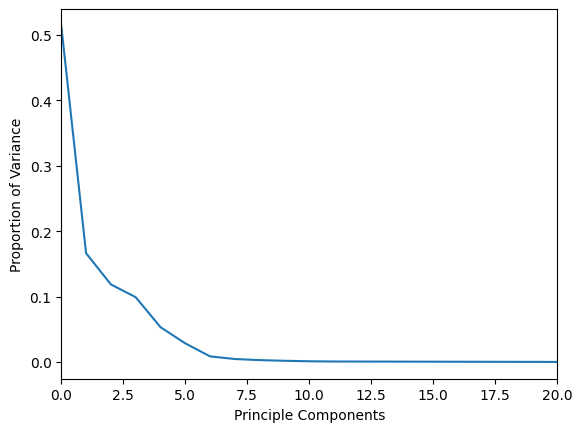

In [12]:
plt.plot(proportion_of_variance)
plt.xlabel("Principle Components")
plt.ylabel("Proportion of Variance")
plt.xlim(0, 20)
print(len(proportion_of_variance))

In [20]:
for i in range(len(proportion_of_variance)): print(i + 1, "with value", proportion_of_variance[i])

1 with value 0.5139463065694261
2 with value 0.1662422128560453
3 with value 0.1185491007899576
4 with value 0.09901248136046609
5 with value 0.05316196935846104
6 with value 0.02841361038649107
7 with value 0.008437953596745235
8 with value 0.004450736023973565
9 with value 0.0027430387116735367
10 with value 0.0017395704208413622
11 with value 0.0010002452894401586
12 with value 0.0006384336709668961
13 with value 0.0005534816582930662
14 with value 0.0003981532821953453
15 with value 0.00034527695913031065
16 with value 0.00027563881638943135
17 with value 9.179024950377033e-05
18 with value 1.3034786389111161e-16
19 with value 1.1762669891715157e-16
20 with value 9.398356934415041e-17
21 with value 9.208985386600644e-17
22 with value 7.90971341856854e-17
23 with value 6.67073552618957e-17
24 with value 5.748697080985284e-17
25 with value 4.568442433395182e-17
26 with value 4.2526442499081517e-17
27 with value 4.071592290972059e-17
28 with value 3.4483040446731403e-17
29 with value 

It seems as if all $144$ values are technically not $0$; however, most of are pretty close to it. I would argue that the threshold for an eigenvalue to be $0$ would be anything less than $1e^{-6}$. Therefore, I would argue that $17$ values are not nonzero. This implies that we do not need all the dimensions of our data to achieve high accuracy.

In [13]:
# testing purposes
# test = hand_data.loc[:, 0]
# test2 = pd.concat([test, test], axis = 1)

# print(np.cov(hand_data.T))
# print(np.cov(hand_data.T).shape)

## **Resources**

https://numpy.org/

https://seaborn.pydata.org/

https://matplotlib.org/